замеры



In [ ]:
print("film=[",(("[], \n")*24),"]")

film=[ [], 
[], 
[], 
[], 
[], 
[], 
[], 
[], 
[], 
[], 
[], 
[], 
[], 
[], 
[], 
[], 
[], 
[], 
[], 
[], 
[], 
[], 
[], 
[], 
 ]


In [1]:
film=[ [108, 44, 20],
[235, 171, 149],
[113, 162, 204],
[71, 94, 28],
[173, 178, 217],
[152, 230, 215],

[252, 115, 17],
[73, 127, 228],
[252, 80, 96],
[88, 43, 102],
[171, 210, 59],
[254, 183, 43],

[13, 67, 194],
[54, 176, 47],
[251, 14, 14],
[254, 233, 33],
[247, 134, 188],
[61, 200, 232],

[250, 250, 251],
[227, 229, 230],
[195, 196, 196],
[145, 143, 138],
[59, 60, 54],
[5, 5, 4]

 ]

digital=[ [128, 68, 35],
[232, 177, 155],
[81, 147, 195],
[80, 122, 41],
[161, 156, 210],
[95, 221, 218],

[247, 146, 10],
[23, 92, 204],
[233, 74, 72],
[78, 21, 106],
[187, 221, 54],
[246, 190, 9],

[0, 25, 174],
[47, 180, 80],
[217, 0, 4],
[253, 228, 10],
[223, 78, 172],
[20, 159, 208],

[248, 250, 250],
[226, 229, 233],
[191, 195, 200],
[134, 141, 143],
[60, 70, 74],
[2, 4, 4],
 ]

In [2]:
import cv2 #  computer vision
from google.colab.patches import cv2_imshow

import numpy as np # matrix math
from matplotlib import pyplot as plt # Plotting software to help us visualize some things

from sklearn.preprocessing import PolynomialFeatures  # making math equations
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score # solving math equations


Red error: 21.096419552175178


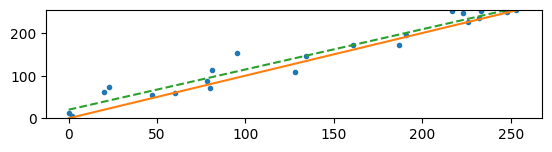


Green error: 20.61875598143481


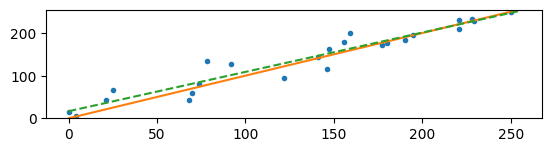


Blue error: 16.400514411891823


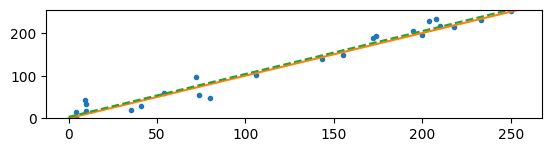

In [3]:

degreesA = 1  # <<====  Number of Polynomial degrees.  1 Recommended. 2 Max.
right=film
wrong=digital













degreesA = 1  # <<====  Number of Polynomial degrees.  1 Recommended. 2 Max.

poly={}
colors = ["Red","Green","Blue"]
xp = np.linspace(0, 255, 255)
for rgb in range(3):
  www = np.ravel(wrong)[rgb::3]
  rrr = np.ravel(right)[rgb::3]

  poly[rgb] = np.polyfit(www, rrr, degreesA)
  p = np.poly1d(poly[rgb])


  delta = p(rrr) - p(www)
  power = np.power(delta,2)
  mean = np.mean(power)
  final = np.sqrt(mean)
  print(colors[rgb],"error:",final)
  plt.subplot(3,1,rgb+1)
  _ = plt.plot(www, rrr, '.', xp, xp, '-', xp, p(xp), '--')
  plt.ylim(0,255)
  plt.show()
  if (final>30):
     print("\t ^ High number implies result is not that optimized")
  print()


In [4]:
degreesB=2  ## 2 or 3 only. 3 can lead to overfitting. 2 recommend for most users.

## Create more data points using previous step's function; this will help prevent overfitting with our next step.

grid = np.linspace(0,255, 2)
rainbow = np.zeros((len(grid)*len(grid)*len(grid),3))
counter = 0
for r in grid:
  for g in grid:
    for b in grid:
      rainbow[counter,0]=r
      rainbow[counter,1]=g
      rainbow[counter,2]=b
      counter+=1

wrong0 = np.vstack((wrong,rainbow))

for rgb in range(3):
  p = np.poly1d(poly[rgb])
  print(colors[rgb],"Pre-Process range:",int(np.min(rainbow[:,rgb])),"-",int(np.max(rainbow[:,rgb])))
  rainbow[:,rgb] = p(rainbow[:,rgb])
  print(colors[rgb],"Post-Process range:",int(np.min(rainbow[:,rgb])),"-",int(np.max(rainbow[:,rgb])))
  print()


right0 = np.vstack((right,rainbow))

r1 = np.ravel(wrong0)[0::3].astype(np.float32, copy=False)  # wrong
g1 = np.ravel(wrong0)[1::3].astype(np.float32, copy=False)
b1 = np.ravel(wrong0)[2::3].astype(np.float32, copy=False)

r0 = np.ravel(right0)[0::3].astype(np.float32, copy=False)  # right
g0 = np.ravel(right0)[1::3].astype(np.float32, copy=False)
b0 = np.ravel(right0)[2::3].astype(np.float32, copy=False)

rgb = np.array([r1,g1,b1])
coes = {}

## FIT THE DATA TO OUR MULTIVARIATE FUNCTIONS
def polyfit3d(rgb,pp,x0):
    degrees = [(i, j, k) for i in range(pp) for j in range(pp) for k in range(pp)]  # list of monomials x**i * y**j to use
    matrix = np.stack([np.prod(rgb.T**d, axis=1) for d in degrees], axis=-1)   # stack monomials like columns
    coeff = np.linalg.lstsq(matrix, x0)[0]    # lstsq returns some additional info we ignore
    #print("Coefficients", coeff)    # in the same order as the monomials listed in "degrees"
    fit = np.dot(matrix, coeff)
    #print(np.sqrt(np.mean((x0-fit)**2)))  ## error
    return coeff

## PREDICT / SOLVE the function for our input data (getting our target data)
def poly3d(rgb,coeff,pp):
    degrees = [(i, j, k) for i in range(pp) for j in range(pp) for k in range(pp)]  # list of monomials x**i * y**j to use
    matrix = np.stack([np.prod(rgb.T**d, axis=1) for d in degrees], axis=-1)   # stack monomials like columns
    fit = np.dot(matrix, coeff)
    return fit

## Generate and Save the functions; one function for each color type
coes[0] = polyfit3d(rgb,degreesB,r0)
coes[1] = polyfit3d(rgb,degreesB,g0)
coes[2] = polyfit3d(rgb,degreesB,b0)


## PLOT DATA POINTS FOR ANALYSIS

rgb0 = np.array([poly3d(rgb,coes[0],degreesB),poly3d(rgb,coes[1],degreesB), poly3d(rgb,coes[2],degreesB)])

from mpl_toolkits.mplot3d import axes3d
import scipy as sp
import scipy.interpolate

fig = plt.figure(figsize=(12,6))
ax = axes3d.Axes3D(fig)

for i in range(len(rgb[0])):
    ax.plot(  [rgb[0,i],rgb0[0,i]],  [rgb[1,i],rgb0[1,i]],  [rgb[2,i],rgb0[2,i]],  'ro-')

ax.scatter3D(rgb0[0],rgb0[1],rgb0[2], c='g')
ax.scatter3D(rgb[0],rgb[1],rgb[2], c='b')

# The graph reflects the transformation of each RGB colour value


def applyLUT(image):
  assert(image.dtype == "float32")
  for rgb in range(3):
    p = np.poly1d(poly[rgb])
    print("PRE range:",np.min(image[:,:,rgb]),"-",np.max(image[:,:,rgb]))
    image[:,:,rgb] = p(image[:,:,rgb])
    print("POST range:",np.min(image[:,:,rgb]),"-",np.max(image[:,:,rgb]))
    print()
  return image

def applyLUT2(image,pp):
  sss = np.shape(image[:,:,0])
  rgb = image.reshape(-1,3).T
  print(np.shape(rgb))
  Zr = poly3d(rgb,coes[0],pp).reshape(sss)
  Zg = poly3d(rgb,coes[1],pp).reshape(sss)
  Zb = poly3d(rgb,coes[2],pp).reshape(sss)
  image[:,:,0] = Zr
  image[:,:,1] = Zg
  image[:,:,2] = Zb
  return image



#img = applyLUT(img) + mb  ## You can disable applyLUT2 and enable this function instead if you are having problems

Red Pre-Process range: 0 - 255
Red Post-Process range: 20 - 260

Green Pre-Process range: 0 - 255
Green Post-Process range: 16 - 251

Blue Pre-Process range: 0 - 255
Blue Post-Process range: 3 - 260



<ipython-input-4-c0561754b871>:43: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coeff = np.linalg.lstsq(matrix, x0)[0]    # lstsq returns some additional info we ignore


<Figure size 1200x600 with 0 Axes>

In [5]:
ls=64 # lut size ; 33 is also a common option

r=0
g=0
b=0
img = np.zeros((ls*ls*ls,3), np.float32)

for x in range(0,ls*ls*ls): # create a neutral LUT first
    if r>=ls:
        r=0
        g+=1
    if g>=ls:
        g=0
        b+=1
    img[x,0]=1/(ls-1)*r
    img[x,1]=1/(ls-1)*g
    img[x,2]=1/(ls-1)*b
    r+=1

img = img.reshape((-1,ls*ls,3))
lutimg = applyLUT2(img*255.0, degreesB)# apply the basic color correction

img = lutimg/255.0
img = img.reshape((-1,3))

with open('r.cube', 'w') as the_file: # save the CUBE LUT to this colab folder I guess
    the_file.write("LUT_3D_SIZE "+str(ls)+"\n")
    for x in range(ls*ls*ls):
        the_file.write("{:1.6f}".format(img[x,0])+" "+"{:1.6f}".format(img[x,1])+" "+"{:1.6f}".format(img[x,2])+'\n')


(3, 262144)


# Новый раздел